#### Darlene Eligado
#### id : 1001889134

# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import copy
import math

In [2]:
# function to generate 1000 examples
def linear_reg_data(n=1000,w=2,b=4,s=0.25,min_x=0,max_x=1):
    x=(max_x-min_x)*np.random.random(n)+min_x
    return x,np.random.normal(0.,s,n)+w*x+b 

# store
x,y=linear_reg_data(s=0.1)

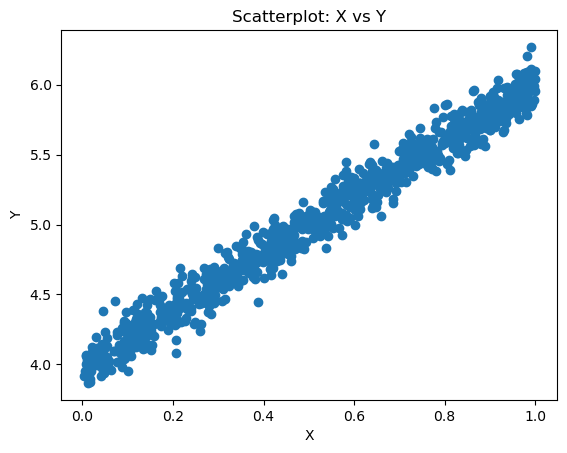

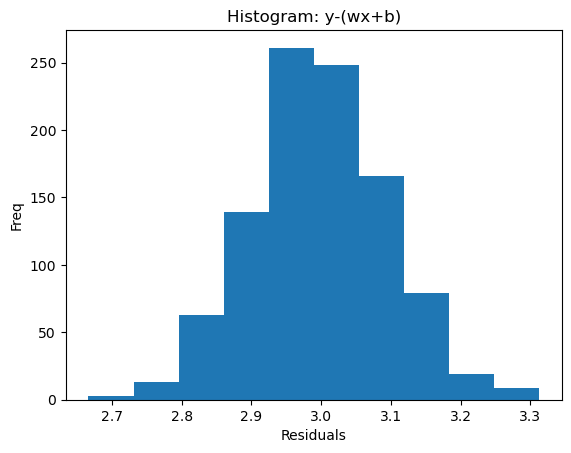

In [3]:
# x vs y scatterplot
plt.scatter(x,y)
plt.title('Scatterplot: X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# histogram y-(wx+b)
plt.hist(y-(2.0*x+1.0))
plt.title('Histogram: y-(wx+b)')
plt.xlabel('Residuals')
plt.ylabel('Freq')
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [4]:
# model_loop function 
def model_loop(x,w,b):
    y = [] # store outpts
    for i in x:
        y.append(w*i+b) # calculate wx+b 
    return y    

In [5]:
# model_np function
def model_np(x,w,b):
    x = np.array(x)
    y = x*w+b # calculate wx+b w/ numpy
    return y

In [6]:
# load linear_reg_data to use data from
x, y = linear_reg_data(n=1000, w=2, b=4, s=0.25, min_x=0,max_x=1)

# parameters from linear_reg_data
w = 2
b = 4

# calculate outputs using the functions
y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)


# are the outputs identical?
if y_loop == y_np.tolist():
    print("\nOutputs dentical.")
else:
    print("\nOutputs not identical.")


Outputs dentical.


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

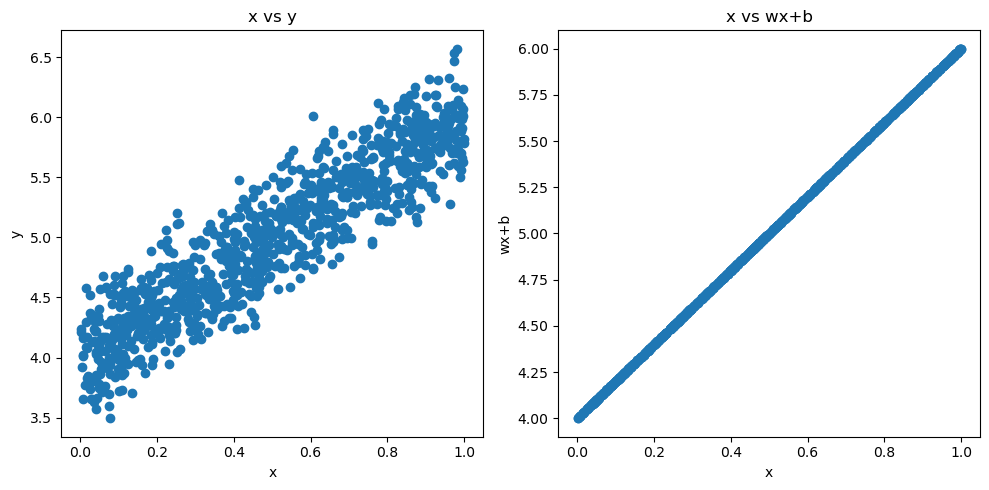

In [7]:
# load linear_reg_data
x, y = linear_reg_data(n=1000, w=2, b=4, s=0.25, min_x=0,max_x=1)

# parameters from linear_reg_data
w = 2
b = 4

# calculate wx+b
wx_b = w*x+b


# make subplots
plt.figure(figsize=(10, 5))

# 'x vs y'
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')

# 'x vs wx+b'
plt.subplot(1, 2, 2)
plt.scatter(x, wx_b)
plt.title('x vs wx+b')
plt.xlabel('x')
plt.ylabel('wx+b')

plt.tight_layout()
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


In [8]:
# make a cost function (MSE)
def cost(x,y,w,b):
    # calc the  yhat (for finding the error(y-y)) using model_np fcn
    y_hat = model_np(x,w,b)
    
    # MSE = mean * error^2
    mse = np.mean((y-y_hat)**2)
    
    return mse

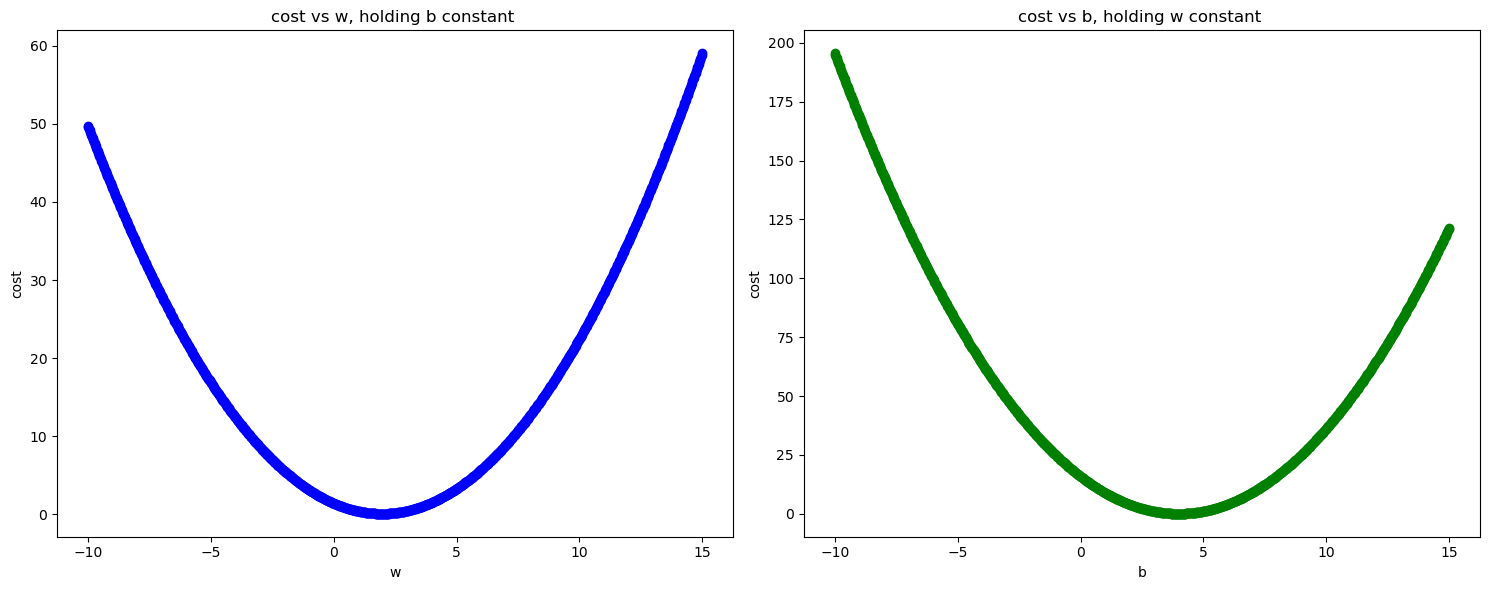

In [9]:
# load linear_reg_data
x, y = linear_reg_data(n=1000, w=2, b=4, s=0.25, min_x=0, max_x=1)

# parameters from linear_reg_data
w = 2
b = 4

# cost vs w, holding b constant 
w_v = np.linspace(-10, 15, 1000)
cost_w = [cost(x, y, w, b) for w in w_v]

# cost vs b, holding w constant 
b_v = np.linspace(-10, 15, 1000)
cost_b = [cost(x, y, w, b) for b in b_v]

# plots
plt.figure(figsize=(15, 6))

# cost vs w
plt.subplot(1, 2, 1)
plt.scatter(w_v, cost_w, color='blue')
plt.title('cost vs w, holding b constant ')
plt.xlabel('w')
plt.ylabel('cost')

# cost vs b
plt.subplot(1, 2, 2)
plt.scatter(b_v, cost_b, color='green')
plt.title('cost vs b, holding w constant ')
plt.xlabel('b')
plt.ylabel('cost')

plt.tight_layout()
plt.show()

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

In [10]:
# gradient function
def gradient(x, y, w, b):
    y_hat = model_np(x, w, b)
    
    # calc gradient of the cost function w/ respect to w
    dj_dw = -2*np.mean(x*(y-y_hat))
    
    # calc gradient of the cost function w/ respect to b
    dj_db = -2*np.mean(y-y_hat)
    return dj_dw, dj_db

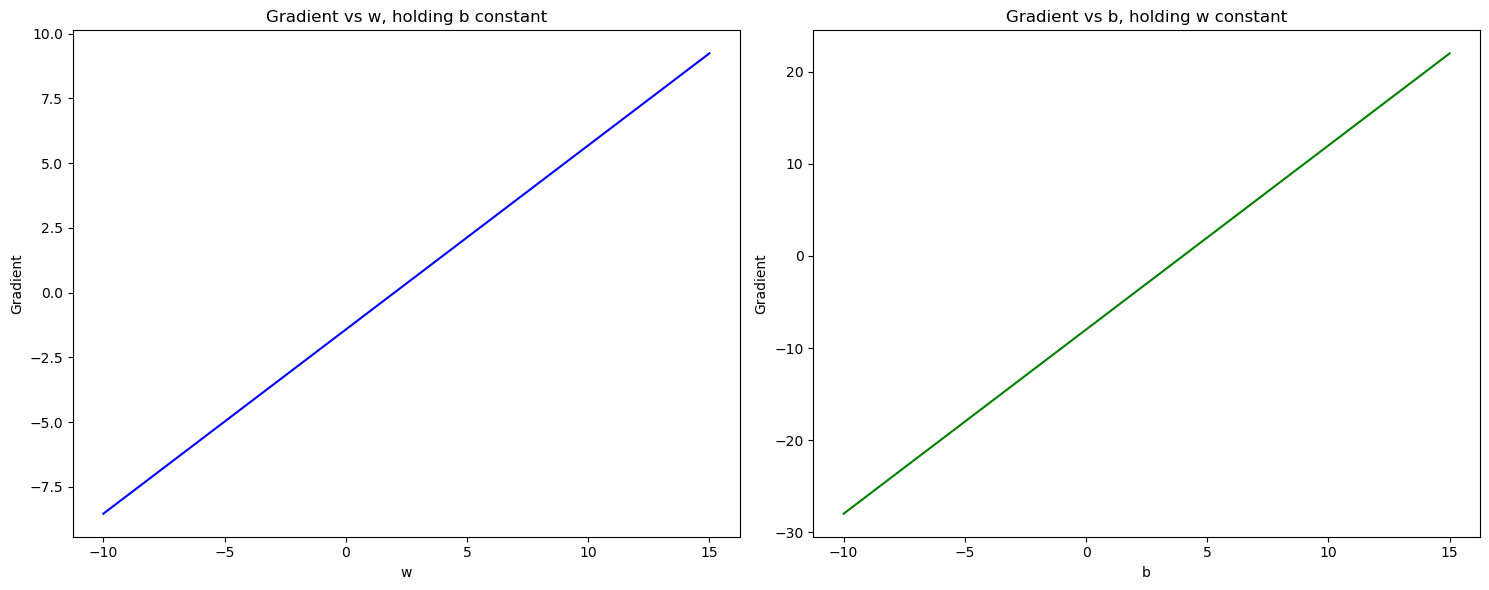

In [11]:
# load linear_reg_data
x, y = linear_reg_data(n=1000, w=2, b=4, s=0.25, min_x=0, max_x=1)

# parameters from linear_reg_data
w = 2
b = 4

# calc gradient of cost fcn w/ respect to w for ea. value in w_v
w_v = np.linspace(-10, 15, 1000)
dj_dw_v = [gradient(x, y, w, b)[0] for w in w_v]

# calc gradient of cost fcn w/ respect to b for ea. value in b_v
b_v = np.linspace(-10, 15, 1000)
dj_db_v = [gradient(x, y, w, b)[1] for b in b_v]

# plots
plt.figure(figsize=(15, 6))

# gradient vs w
plt.subplot(1, 2, 1)
plt.plot(w_v, dj_dw_v, color = "blue")
plt.title('Gradient vs w, holding b constant')
plt.xlabel('w')
plt.ylabel('Gradient')
  

# gradient vs b
plt.subplot(1, 2, 2)
plt.plot(b_v, dj_db_v, color = "green")
plt.title('Gradient vs b, holding w constant')
plt.xlabel('b')
plt.ylabel('Gradient')

plt.tight_layout()
plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 1.63e+00  dj_dw: -5.128e+00, dj_db: -9.943e+00   w:  1.538e+00, b: 2.98277e+00
Iteration  100: Cost 6.28e-02  dj_dw:  8.986e-05, dj_db: -4.640e-05   w:  2.018e+00, b: 3.99638e+00
Iteration  200: Cost 6.28e-02  dj_dw:  1.727e-06, dj_db: -8.918e-07   w:  2.018e+00, b: 3.99672e+00
Iteration  300: Cost 6.28e-02  dj_dw:  3.320e-08, dj_db: -1.714e-08   w:  2.018e+00, b: 3.99672e+00
Iteration  400: Cost 6.28e-02  dj_dw:  6.380e-10, dj_db: -3.294e-10   w:  2.018e+00, b: 3.99672e+00
Iteration  500: Cost 6.28e-02  dj_dw:  1.226e-11, dj_db: -6.332e-12   w:  2.018e+00, b: 3.99672e+00
Iteration  600: Cost 6.28e-02  dj_dw:  2.355e-13, dj_db: -1.220e-13   w:  2.018e+00, b: 3.99672e+00
Iteration  700: Cost 6.28e-02  dj_dw:  4.722e-15, dj_db: -2.057e-15   w:  2.018e+00, b: 3.99672e+00
Iteration  800: Cost 6.28e-02  dj_dw:  6.084e-16, dj_db: -6.226e-16   w:  2.018e+00, b: 3.99672e+00
Iteration  900: Cost 6.28e-02  dj_dw:  6.084e-16, dj_db: -6.226e-16   w:  2.018e+00, b: 3.99672e+00


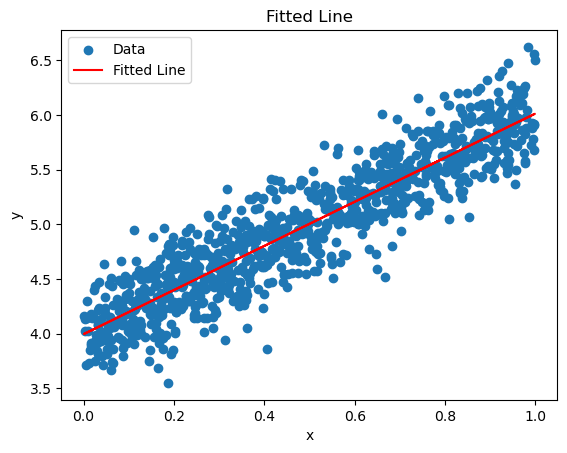

In [13]:
# load linear_reg_data
x, y = linear_reg_data(n=1000, w=2, b=4, s=0.25, min_x=0, max_x=1)

w_in = 0
b_in = 0

# learning rate
alpha = 0.3  

num_iters = 1000  

# gradient descents
w_fit, b_fit, J_history, p_history = gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient)


# plot fitted line
plt.scatter(x, y, label="Data")
plt.plot(x, model_np(x, w_fit, b_fit), label="Fitted Line", color="red")
plt.title("Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

7. Plot the cost and parameters versus iteration of gradient descent.

Iteration    0: Cost 1.52e+00  dj_dw: -5.365e+00, dj_db: -1.005e+01   w:  1.610e+00, b: 3.01382e+00
Iteration  100: Cost 5.91e-02  dj_dw:  3.361e-04, dj_db: -1.803e-04   w:  1.985e+00, b: 4.02757e+00
Iteration  200: Cost 5.91e-02  dj_dw:  6.253e-06, dj_db: -3.354e-06   w:  1.982e+00, b: 4.02888e+00
Iteration  300: Cost 5.91e-02  dj_dw:  1.163e-07, dj_db: -6.241e-08   w:  1.982e+00, b: 4.02890e+00
Iteration  400: Cost 5.91e-02  dj_dw:  2.165e-09, dj_db: -1.161e-09   w:  1.982e+00, b: 4.02890e+00
Iteration  500: Cost 5.91e-02  dj_dw:  4.028e-11, dj_db: -2.161e-11   w:  1.982e+00, b: 4.02890e+00
Iteration  600: Cost 5.91e-02  dj_dw:  7.492e-13, dj_db: -4.026e-13   w:  1.982e+00, b: 4.02890e+00
Iteration  700: Cost 5.91e-02  dj_dw:  1.381e-14, dj_db: -7.834e-15   w:  1.982e+00, b: 4.02890e+00
Iteration  800: Cost 5.91e-02  dj_dw:  3.295e-16, dj_db: -1.275e-15   w:  1.982e+00, b: 4.02890e+00
Iteration  900: Cost 5.91e-02  dj_dw:  3.295e-16, dj_db: -1.275e-15   w:  1.982e+00, b: 4.02890e+00


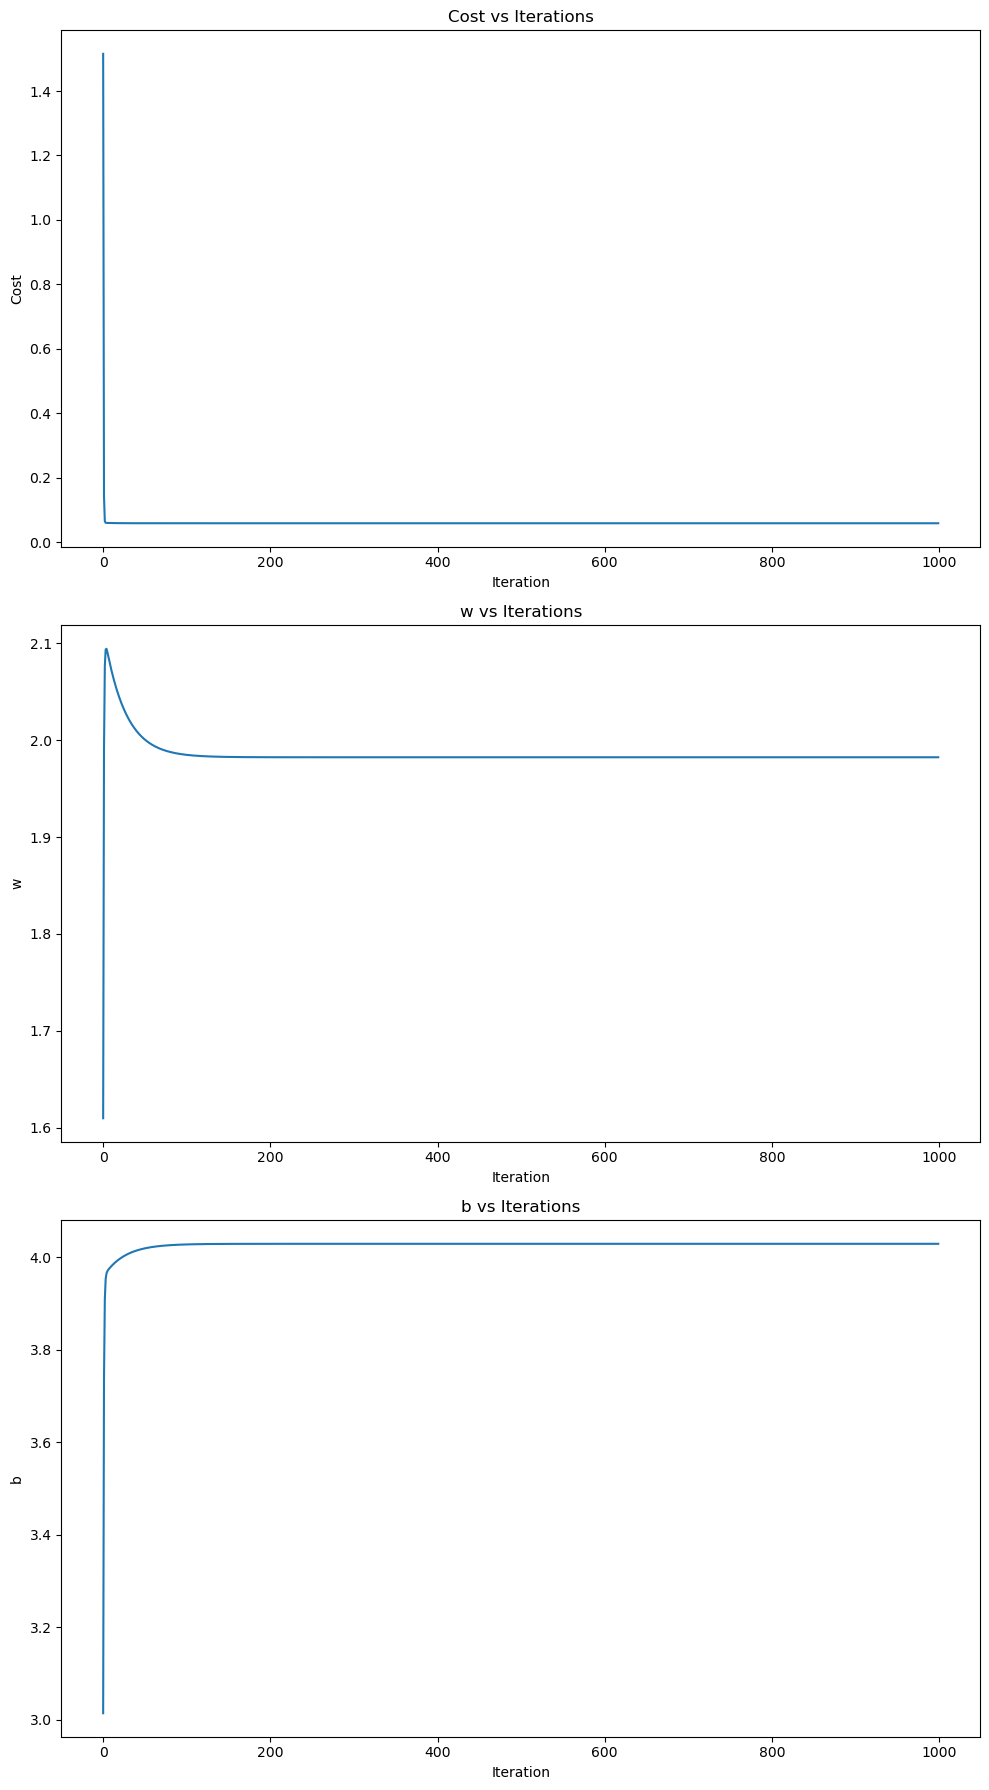

In [14]:
# load linear regression data
x, y = linear_reg_data(n=1000, w=2, b=4, s=0.25, min_x=0, max_x=1)

w_in = 0
b_in = 0

alpha = 0.3  # learning rate
num_iters = 1000 

# gradient descent
w_fit, b_fit, J_history, p_history = gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient)


# plots

# Plot the cost function history
plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
plt.plot(range(num_iters), J_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.subplot(3, 1, 2)
plt.plot(range(num_iters), [p[0] for p in p_history])
plt.title("w vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("w")

plt.subplot(3, 1, 3)
plt.plot(range(num_iters), [p[1] for p in p_history])
plt.title("b vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("b")

plt.tight_layout()
plt.show()